# VAR Model

In [ ]:
from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import time
import yfinance as yf

In [ ]:
stock_symbol = "BA"
end_date = date.today()
start_date = end_date - timedelta(days=365 * 5)  # 5 years

df_b = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_b.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-12,370.209991,370.480011,355.989990,357.029999,346.924896,3088700
2018-11-13,349.549988,355.380005,342.040009,349.510010,339.617767,4960000
2018-11-14,352.089996,355.850006,343.890015,344.720001,334.963318,3445800
2018-11-15,341.119995,347.980011,336.510010,341.570007,331.902496,4863000
2018-11-16,339.000000,340.190002,331.160004,335.950012,326.441559,4425200


In [ ]:
df_b = df_b.reset_index(drop=True)

In [ ]:
close = df_b['Close']
close_diff = close.diff()[1:]
vol = df_b['Volume']
vol_diff = vol.diff()[1:]
high = df_b['High']
high_diff = high.diff()[1:]

data = np.array([close_diff,vol_diff,high_diff])
data = np.transpose(data)
df = pd.DataFrame(data,columns=['close_diff','vol_diff','high_diff'])

**NORMALIZE**

In [ ]:
avgs = df.mean()
devs = df.std()

In [ ]:
for col in df.columns:
    df[col] = (df[col] - avgs.loc[col]) / devs.loc[col]

In [ ]:
df.describe()

,close_diff,vol_diff,high_diff
count,1.257000e+03,1.257000e+03,1.257000e+03
mean,7.772444e-18,1.731135e-17,2.402392e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.578753e+00,-5.081761e+00,-6.262853e+00
25%,-4.851004e-01,-3.370700e-01,-5.013686e-01
50%,4.341003e-03,-2.988512e-02,-2.237309e-02
75%,4.859178e-01,2.573606e-01,4.887789e-01
max,4.906647e+00,6.673790e+00,7.946210e+00


In [ ]:
train, test = df[:-60], df[-60:]

Text(0.5, 1.0, 'BA Returns')

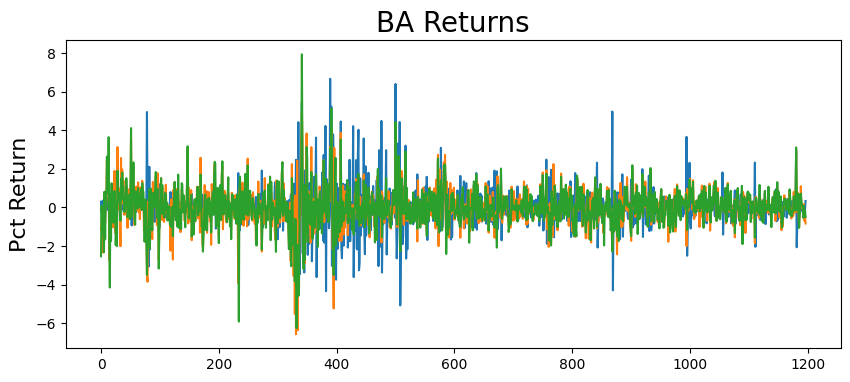

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train['vol_diff'])
plt.plot(train['close_diff'])
plt.plot(train['high_diff'])

plt.ylabel('Pct Return', fontsize=16)
plt.title('BA Returns', fontsize=20)

### Pacf Close

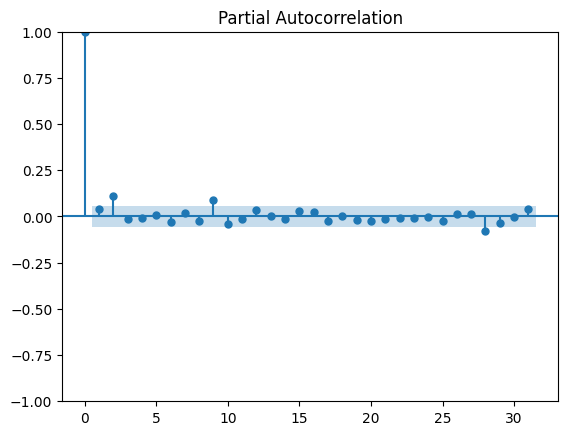

In [ ]:
plot_pacf(train['close_diff'])
plt.show()

In [ ]:
for lag in range(1, 14):
    close_series = train['close_diff'].iloc[lag:]
    vol_series = train['vol_diff'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(close_series, vol_series))
    print('------')


Lag: 1
PearsonRResult(statistic=-0.004479448969112861, pvalue=0.8770163470131843)
------
Lag: 2
PearsonRResult(statistic=0.0029375131688143207, pvalue=0.919201049172235)
------
Lag: 3
PearsonRResult(statistic=0.03391539337736998, pvalue=0.24158581276152358)
------
Lag: 4
PearsonRResult(statistic=-0.06446261756850573, pvalue=0.025980043266163922)
------
Lag: 5
PearsonRResult(statistic=-0.02836362802112777, pvalue=0.32785986378591414)
------
Lag: 6
PearsonRResult(statistic=0.05639120005359276, pvalue=0.05170111884984559)
------
Lag: 7
PearsonRResult(statistic=0.004204846692053019, pvalue=0.8847896871180194)
------
Lag: 8
PearsonRResult(statistic=-0.020804389851983993, pvalue=0.4735607797125007)
------
Lag: 9
PearsonRResult(statistic=-0.02850660638983877, pvalue=0.3262412128517803)
------
Lag: 10
PearsonRResult(statistic=0.015620456702013728, pvalue=0.5908288549913465)
------
Lag: 11
PearsonRResult(statistic=0.019942379517658128, pvalue=0.4926332179373943)
------
Lag: 12
PearsonRResult(st

In [ ]:
for lag in range(1, 14):
    close_series = train['close_diff'].iloc[lag:]
    vol_series = train['high_diff'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(close_series, vol_series))
    print('------')

Lag: 1
PearsonRResult(statistic=0.1114366254272077, pvalue=0.00011253499005838477)
------
Lag: 2
PearsonRResult(statistic=0.06016122893419744, pvalue=0.03757995749185733)
------
Lag: 3
PearsonRResult(statistic=0.010128245948211633, pvalue=0.7266262244856676)
------
Lag: 4
PearsonRResult(statistic=0.017405167262043376, pvalue=0.5481151996279988)
------
Lag: 5
PearsonRResult(statistic=-0.03664610333016063, pvalue=0.20611630564272612)
------
Lag: 6
PearsonRResult(statistic=-0.03946797204710383, pvalue=0.17345868052683766)
------
Lag: 7
PearsonRResult(statistic=0.004728143970991821, pvalue=0.8705709236675198)
------
Lag: 8
PearsonRResult(statistic=0.006194249038484208, pvalue=0.8310409219195938)
------
Lag: 9
PearsonRResult(statistic=0.04761483970296781, pvalue=0.10093005457871941)
------
Lag: 10
PearsonRResult(statistic=-0.0033645511675407715, pvalue=0.9078137218424899)
------
Lag: 11
PearsonRResult(statistic=0.011719285023661114, pvalue=0.6868149918851698)
------
Lag: 12
PearsonRResult(s

In [ ]:
model = VAR(train)
model_fit = model.fit(maxlags=6)
model_fit.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 11, Nov, 2023
Time:                     16:52:44
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -1.60398
Nobs:                     1191.00    HQIC:                  -1.75557
Log likelihood:          -3912.84    FPE:                   0.157675
AIC:                     -1.84723    Det(Omega_mle):        0.150363
--------------------------------------------------------------------
Results for equation close_diff
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                 0.007272         0.029139            0.250           0.803
L1.close_diff        -0.058947         0.058313           -1.011           0.312
L1.vol_diff          -0.027065         0.034419        

only those with prob <0.05

In [ ]:
df_check = pd.concat([train,test])

In [ ]:
df_check['close_diff(t)'] = (
    0.132866 * df_check['high_diff'].shift(1)
    - 0.085043 * df_check['vol_diff'].shift(4)
    - 0.162729 * df_check['high_diff'].shift(5)
    + 0.124672 * df_check['close_diff'].shift(6)
    + 0.072563 * df_check['vol_diff'].shift(6)
    - 0.142034 * df_check['high_diff'].shift(6)
)

Text(0.5, 1.0, 'BA Returns Train')

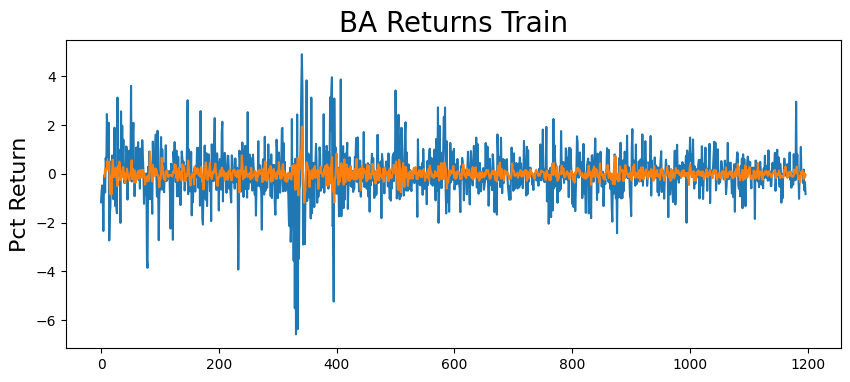

In [ ]:
pred = df_check[:-60]['close_diff(t)']

plt.figure(figsize=(10,4))
plt.plot(train['close_diff'])
plt.plot(pred)

plt.ylabel('Pct Return', fontsize=16)
plt.title('BA Returns Train', fontsize=20)

Test MSE: 0.239


Text(0.5, 1.0, 'BA Returns Test')

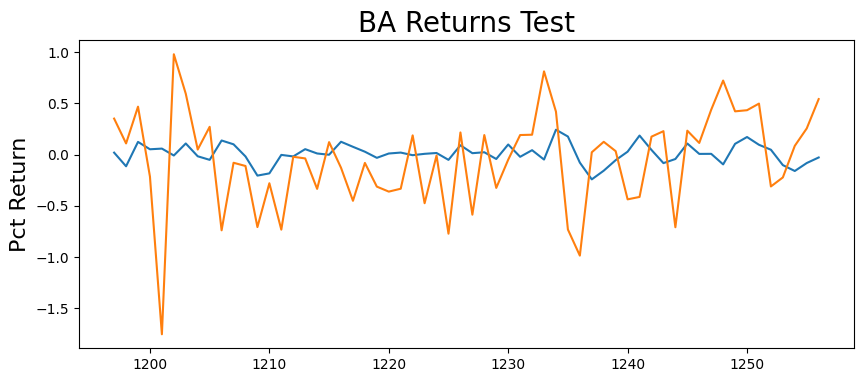

In [ ]:
pred = df_check[-60:]['close_diff(t)']

mse = (mean_squared_error(test['close_diff'], pred))
print('Test MSE: %.3f' % mse)

plt.figure(figsize=(10,4))
plt.plot(pred)
plt.plot(test['close_diff'])

plt.ylabel('Pct Return', fontsize=16)
plt.title('BA Returns Test', fontsize=20)